# 2.
Cree una instancia de base de dastos en Docker para solucinar las consultas

# 3.
Cree la imagen Docker y la base de datos con la siguiente información de conexión.

Host: localhost

Port: 5342

Database Name: myname_db

User Name: myname_user

Password: password

con este codigo:

"docker run --name myname_db -e POSTGRES_USER=myname_user -e POSTGRES_PASSWORD=password -p 5342:5432 -d postgres"

me conecte con 

"docker exec -it myname_db bash" despues " psql -U myname_user --password" y finalmente escribir la contraseña.




# 4.
cree una conexión y un cursor para I) Crear la tabla nombrada: employees y explicar que tarea realiza la consulta realizada y mostrar en pantalla la tabla

In [1]:
import psycopg2
from psycopg2 import Error

In [ ]:
import psycopg2
import csv

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

# Establecer conexión
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

cursor = conn.cursor()

cursor.execute('''DROP TABLE IF EXISTS employees''')
cursor.execute('''CREATE TABLE employees
                ( employee_id INTEGER
                , first_name VARCHAR(20)
                , last_name VARCHAR(25)
                , email VARCHAR(25)
                , phone_number VARCHAR(20)
                , hire_date DATE
                , job_id VARCHAR(10)
                , salary NUMERIC(8,2)
                , commission_pct NUMERIC(2,2)
                , manager_id INTEGER
                , department_id INTEGER
                ) ;
''')
cursor.execute('''CREATE UNIQUE INDEX emp_emp_id_pk
               ON employees (employee_id) ;''')
cursor.execute('''ALTER TABLE employees ADD PRIMARY KEY (employee_id);''')

conn.commit()
conn.close()

In [3]:
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

cursor = conn.cursor()

#cursor.execute('''''')
cursor.execute('''SELECT * FROM employees LIMIT 10;''')

cursor.execute('''SELECT count(1) FROM employees;''')

conn.commit()
conn.close()

No hay respuesta a esta sentencia.

II) Crear la tabla courses con las siguientes columnas

In [5]:


conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

cursor = conn.cursor()

#cursor.execute('''''')
create_table_query = """
CREATE TABLE courses (
    course_id SERIAL PRIMARY KEY,
    course_name VARCHAR(60),
    course_author VARCHAR(40),
    course_status VARCHAR(20),
    course_published_dt DATE
); """

#cursor.execute('''''')
cursor.execute(create_table_query)

conn.commit()
conn.close()



In [6]:


conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

cursor = conn.cursor()


cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Python', 'Bob Dillon', 'published', '2020-09-30')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Data Engineering using Python', 'Bob Dillon', 'published', '2020-07-15')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status) VALUES ('Data Engineering using Scala', 'Elvis Presly', 'draft')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Scala', 'Elvis Presly', 'published','2020-05-12')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Programming using Java', 'Mike Jack', 'inactive', '2020-08-10')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Web Applications-Python Flask', 'Bob Dillon', 'inactive', '2020-07-20')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status) VALUES ('Web Applications-Java Spring', 'Mike Jack', 'draft')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status) VALUES ('Pipeline Orchestraction-Python', 'Bob Dillon', 'draft')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Streaming Pipelines-Python', 'Bob Dillon', 'published','2020-10-05')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Web Applications Scala Play', 'Elvis Presly', 'inactive','2020-09-30')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Web Application-Python Django', 'Bob Dillon', 'published','2020-06-23')");
cursor.execute("INSERT INTO courses (course_name, course_author, course_status, course_published_dt) VALUES ('Server Automation-Ansible', 'Uncle Sam', 'published','2020-07-05')");

conn.commit()
conn.close()

In [ ]:
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)



# Crear un cursor
cursor = conn.cursor()

# Eliminar cursos inactivos
delete_query = "DELETE FROM courses WHERE course_status = 'inactive';"
cursor.execute(delete_query)

# Confirmar los cambios
conn.commit()

# Obtener el número total de filas eliminadas
total_deleted = cursor.rowcount
print("borradas:", total_deleted)



# Confirmar los cambios
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()




In [8]:
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)



# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT course_author, COUNT(*) AS course_count
FROM courses
GROUP BY course_author
ORDER BY course_author ASC
'''
cursor.execute(query)

# Recopilar los resultados en una lista de registros
results = cursor.fetchall()

# Imprimir el encabezado
print("Recuento de cursos por autor:")

# Iterar a través de los registros y mostrar el autor y el recuento
for result in results:
    author = result[0]
    count = result[1]
    print(f"Autor: {author}, Recuento: {count}")
    
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

Recuento de cursos por autor:
Autor: Bob Dillon, Recuento: 5
Autor: Elvis Presly, Recuento: 2
Autor: Mike Jack, Recuento: 1
Autor: Uncle Sam, Recuento: 1


VI) Crear la base de datos users

In [12]:
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)



# Crear un cursor
cursor = conn.cursor()

query = '''
CREATE TABLE users(
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP
)
'''
cursor.execute(query)
    
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

Inserte los siguientes valores

In [13]:
conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)



# Crear un cursor
cursor = conn.cursor()

query = '''
insert into users (
    user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts
) VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', null, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', null, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', null, '830-40-5287',
     null, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', null, '778-0845', 
     null, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28')
'''
cursor.execute(query)
    
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

VII) Obtenga el número de usuarios creados por año. Utilice la tabla de usuarios para este ejercicio.

In [14]:
import psycopg2

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    date_part('year', created_ts) AS created_year,
    COUNT(*) AS user_count
FROM
    users
GROUP BY
    created_year
ORDER BY
    created_year;
'''
cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    created_year = row[0]
    user_count = row[1]
    print(f"Year: {created_year}, Count: {user_count}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


Year: 2018.0, Count: 13
Year: 2019.0, Count: 4
Year: 2020.0, Count: 8


VIII) Obtenga los días de nacimiento de todos los usuarios nacidos en el mes May.

In [15]:
import psycopg2

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    user_id,
    user_dob,
    user_email_id,
    TO_CHAR(user_dob, 'FMDay') AS user_day_of_birth
FROM
    users
WHERE
    EXTRACT(MONTH FROM user_dob) = 5
ORDER BY
    EXTRACT(DAY FROM user_dob);

'''
cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    user_id = row[0]
    user_dob = row[1]
    user_email_id = row[2]
    user_day_of_birth = row[3]
    print(f"User ID: {user_id}, User DOB: {user_dob}, User Email ID: {user_email_id}, User Day of Birth: {user_day_of_birth}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


User ID: 4, User DOB: 1998-05-24, User Email ID: mtanswill3@dedecms.com, User Day of Birth: Sunday
User ID: 12, User DOB: 1983-05-26, User Email ID: uglayzerb@pinterest.com, User Day of Birth: Thursday
User ID: 1, User DOB: 1973-05-31, User Email ID: gbode0@imgur.com, User Day of Birth: Thursday
User ID: 2, User DOB: 2003-05-31, User Email ID: lgisbey1@mail.ru, User Day of Birth: Saturday


IX) Obtenga los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019.

In [16]:
import psycopg2

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    user_id,
    UPPER(CONCAT(user_first_name, ' ', user_last_name)) AS user_name,
    user_email_id,
    created_ts,
    EXTRACT(YEAR FROM created_ts) AS created_year
FROM
    users
WHERE
    EXTRACT(YEAR FROM created_ts) = 2019
ORDER BY
    user_name;

'''
cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    user_id = row[0]
    user_name = row[1]
    user_email_id = row[2]
    created_ts = row[3]
    created_year = row[4]
    print(f"User ID: {user_id}, User Name: {user_name}, User Email ID: {user_email_id}, Created Timestamp: {created_ts}, Created Year: {created_year}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


User ID: 8, User Name: CYBIL LISSIMORE, User Email ID: clissimore7@pinterest.com, Created Timestamp: 2019-12-09 14:08:30, Created Year: 2019
User ID: 25, User Name: PHYLYS ASLIE, User Email ID: paslieo@qq.com, Created Timestamp: 2019-10-01 01:34:28, Created Year: 2019
User ID: 12, User Name: UNA GLAYZER, User Email ID: uglayzerb@pinterest.com, Created Timestamp: 2019-09-17 03:24:21, Created Year: 2019
User ID: 17, User Name: YANKEE JELF, User Email ID: yjelfg@wufoo.com, Created Timestamp: 2019-09-16 16:09:12, Created Year: 2019


X) Obtenga el número de usuarios por género. Utilice la tabla de users para este ejercicio.


In [17]:
import psycopg2

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    CASE
        WHEN user_gender = 'M' THEN 'Male'
        WHEN user_gender = 'F' THEN 'Female'
        ELSE 'Not Specified'
    END AS gender,
    COUNT(*) AS user_count
FROM
    users
GROUP BY
    gender
ORDER BY
    user_count DESC;

'''
cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    gender = row[0]
    user_count = row[1]
    print(f"Gender: {gender}, User Count: {user_count}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


Gender: Female, User Count: 13
Gender: Male, User Count: 10
Gender: Not Specified, User Count: 2


XII) Obtenga los 4 últimos dígitos de los ids únicos.

In [18]:

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    user_id,
    COALESCE(
        CASE
            WHEN LENGTH(REPLACE(user_unique_id, '-', '')) >= 9
            THEN RIGHT(REPLACE(user_unique_id, '-', ''), 4)
            ELSE 'Invalid Unique Id'
        END,
        'Not Specified'
    ) AS user_unique_id_last4
FROM
    users
ORDER BY
    user_id;

'''
cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    user_id = row[0]
    user_unique_id_last4 = row[1]
    print(f"User ID: {user_id}, User Unique ID Last 4: {user_unique_id_last4}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


User ID: 1, User Unique ID Last 4: 8759
User ID: 2, User Unique ID Last 4: 1029
User ID: 3, User Unique ID Last 4: 2823
User ID: 4, User Unique ID Last 4: 1380
User ID: 5, User Unique ID Last 4: 6869
User ID: 6, User Unique ID Last 4: 4933
User ID: 7, User Unique ID Last 4: 4752
User ID: 8, User Unique ID Last 4: 4198
User ID: 9, User Unique ID Last 4: 6762
User ID: 10, User Unique ID Last 4: 1646
User ID: 11, User Unique ID Last 4: 5258
User ID: 12, User Unique ID Last 4: 3366
User ID: 13, User Unique ID Last 4: 6844
User ID: 14, User Unique ID Last 4: 8943
User ID: 15, User Unique ID Last 4: 5869
User ID: 16, User Unique ID Last 4: 0503
User ID: 17, User Unique ID Last 4: 0411
User ID: 18, User Unique ID Last 4: 5785
User ID: 19, User Unique ID Last 4: 6181
User ID: 20, User Unique ID Last 4: 0287
User ID: 21, User Unique ID Last 4: Invalid Unique Id
User ID: 22, User Unique ID Last 4: Invalid Unique Id
User ID: 23, User Unique ID Last 4: 5287
User ID: 24, User Unique ID Last 4: Inva

XIII) Obtenga el recuento de usuarios en función del código de país.

In [76]:
import psycopg2

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

query = '''
SELECT
    SUBSTRING(user_phone_no FROM '^\\+([0-9]+)') AS country_code,
    COUNT(*) AS user_count
FROM
    users
WHERE
    user_phone_no IS NOT NULL AND user_phone_no ~ '^\\+[0-9]+'
GROUP BY
    country_code
ORDER BY
    country_code DESC;
'''

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    country_code = row[0]
    user_count = row[1]
    print(f"Country Code: {country_code}, User Count: {user_count}")

conn.commit()
# Cerrar el cursor y la conexión
cursor.close()
conn.close()


Country Code: 86, User Count: 4
Country Code: 84, User Count: 1
Country Code: 81, User Count: 1
Country Code: 7, User Count: 2
Country Code: 63, User Count: 1
Country Code: 62, User Count: 3
Country Code: 598, User Count: 1
Country Code: 55, User Count: 1
Country Code: 54, User Count: 1
Country Code: 48, User Count: 1
Country Code: 420, User Count: 1
Country Code: 380, User Count: 1
Country Code: 370, User Count: 1
Country Code: 351, User Count: 1
Country Code: 249, User Count: 1
Country Code: 229, User Count: 1
Country Code: 1, User Count: 1


# 5 
Importe los datos del precio de Cardano USD (ADA-USD) en su instancia de base de datos Docker, teniendo en cuenta lo explicado durante esta sección. Luego dibuje un gráfico de candlestick para la criptomoneda. En el siguiente link encontrará el CSV de Cardano: Cardano USD (ADA-USD). Describa lo que puede observar en la serie de tiempo. Realice un análisis exploratorio de datos (EDA) para la serie de tiempo.

In [19]:
# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

cursor.execute('''DROP TABLE IF EXISTS cardano_prices''')
cursor.execute('''CREATE TABLE cardano_prices (
                date DATE,
                open NUMERIC,
                high NUMERIC,
                low NUMERIC,
                close NUMERIC,
                adj_close NUMERIC,
                volume BIGINT);
                ''')


conn.commit()
cursor.close()

In [20]:
# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

# Abrir el archivo CSV
file=r'C:\Users\hp\Documents\cvs\ADA-USD.csv'
with open(file, mode='r', newline='', encoding='utf-8') as f: #Aqui tienes que poner el link de tu archivo
    reader = csv.reader(f)
    next(reader)  # Saltar la cabecera
    for row in reader:
        # Convertir 'null' a None
        row = [None if x == 'null' else x for x in row]
        cursor.execute(
            "INSERT INTO cardano_prices (date, open, high, low, close, adj_close, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)",
            row
        )

# Confirmar los cambios
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()




In [22]:
import pandas as pd
# Define la ruta del archivo
file_path = file


data_frame = pd.read_csv(file_path)
print(data_frame.head())  # Imprime las primeras 5 filas del DataFrame

         Date      Open      High       Low     Close  Adj Close      Volume
0  2017-10-01  0.021678  0.032226  0.017354  0.024969   0.024969  50068700.0
1  2017-10-02  0.024607  0.030088  0.019969  0.025932   0.025932  57641300.0
2  2017-10-03  0.025757  0.027425  0.020690  0.020816   0.020816  16997800.0
3  2017-10-04  0.020864  0.022806  0.020864  0.021931   0.021931   9000050.0
4  2017-10-05  0.021951  0.022154  0.020859  0.021489   0.021489   5562510.0


In [23]:
import pandas as pd
import plotly.graph_objects as go

# Parámetros de conexión
host = "localhost"
port = "5342"
dbname = "myname_user"
user = "myname_user"
password = "password"

conn = psycopg2.connect(
    host=host,
    port=port,
    dbname=dbname,
    user=user,
    password=password
)

# Crear un cursor
cursor = conn.cursor()

df = pd.read_sql("SELECT * FROM cardano_prices", conn)

# Crear el gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='Gráfico de Candlestick de Cardano USD (ADA-USD)',
                  xaxis_title='Fecha',
                  yaxis_title='Precio')

fig.show()



# Cerrar el cursor y la conexión
cursor.close()
conn.close()


C:\Users\hp\AppData\Local\Temp\ipykernel_15072\2595964484.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM cardano_prices", conn)


En el análisis de la serie de tiempo, se observa que en los años previos a 2018, el valor de la criptomoneda Cardano (ADA) se mantuvo en niveles cercanos a cero. Sin embargo, a partir de enero de ese año, se produjo un aumento significativo en el precio, alcanzando aproximadamente 1 dólar. Posteriormente, a lo largo de ese año, el precio experimentó una disminución constante hasta regresar a valores cercanos a cero.

En 2021, se registró nuevamente un rápido crecimiento en el valor de la moneda, llegando a un pico de alrededor de 2.5 dólares. En julio del mismo año, se produjo otro pico que elevó el precio a aproximadamente 3.2 dólares, y el año 2021 se cerró con un valor cercano a 2.5 dólares.

Este análisis muestra la naturaleza volátil e impredecible de esta criptomoneda, lo que dificulta la predicción de su comportamiento.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


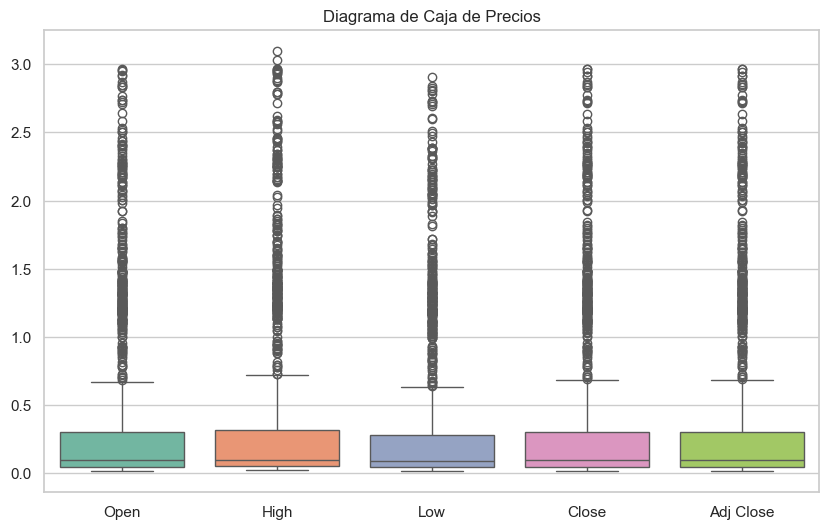

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Definir el estilo del gráfico (puedes personalizarlo según tus preferencias)
sns.set(style="whitegrid")

# Seleccionar los datos del DataFrame
data = data_frame[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Crear el diagrama de caja
sns.boxplot(data=data, palette='Set2')

# Agregar un título
plt.title('Diagrama de Caja de Precios')

# Mostrar el gráfico
plt.show()



Podemos ver como todas las cajas tienen la mayoria de valores entre 0 y 0.5 de precio, asi como tambien su mediana es aproximandamnte 0.21 y como hay muchisimos datos atipicos graficados valores que llegan hasta 3 dolares, y por el bigote que llegas hasta 0.75 se ve que al superar esta cifra ya se considera un valor atipico lo que se contrasta con el grafico de velas ya que la mayor parte del tiempo se ecuentran entre 0 y 0.5 los precios. 

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Seleccionar una columna de precios (por ejemplo, 'Close')
price_data = data_frame['Close']

# Reemplazar los valores NaN con la media de la serie
price_data.fillna(price_data.mean(), inplace=True)

# Realizar la prueba de Dickey-Fuller
result = adfuller(price_data)

# Imprimir los resultados de la prueba
print('Estadística de prueba ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

# Interpretar los resultados
if result[1] <= 0.05:
    print('La serie temporal es estacionaria (rechazamos la hipótesis nula)')
else:
    print('La serie temporal no es estacionaria (no podemos rechazar la hipótesis nula)')



Estadística de prueba ADF: -0.5734908237646756
Valor p: 0.8768602168746882
Valores críticos: {'1%': -3.4348616379354793, '5%': -2.8635325860671696, '10%': -2.567830836482784}
La serie temporal no es estacionaria (no podemos rechazar la hipótesis nula)


Valor p: 0.8769: El valor p es mayor que el nivel de significancia típico de 0.05. En este contexto, un valor p alto indica que no podemos rechazar la hipótesis nula. La hipótesis nula en la prueba ADF afirma que los datos de la serie temporal son no estacionarios. Dado que no podemos rechazar la hipótesis nula, podemos concluir que la serie temporal no es estacionaria es decir que sus propiedades estadísticas cambian con el tiempo y, en particular, no mantienen una media, varianza o estructura constante a lo largo de la serie.